One dataset that could be interesting to work with is the "Titanic" dataset, which contains information about the passengers aboard the Titanic, including their age, gender, ticket class, and whether they survived or not. One potential problem to analyze with this dataset could be predicting whether a passenger would survive or not based on their characteristics. This problem can be framed as a binary classification problem, where the goal is to predict whether a passenger would survive or not, given their input features.

Cleaning the Titanic dataset involves several steps to ensure that the data is accurate, complete, and consistent. Here are some steps that you can follow to clean the Titanic dataset:

Remove irrelevant columns: Remove columns that are not useful for the analysis, such as PassengerId, Name, and Ticket.

Handle missing values: Check for missing values in the dataset and decide how to handle them. For example, if a significant percentage of the data is missing in a column, you might want to remove that column. If only a few rows have missing values, you could either remove those rows or impute the missing values with a reasonable value, such as the median or mean of the column.

Check for outliers: Check for any values that are significantly different from the rest of the data, and decide whether to remove them or keep them.

Standardize the data: Check for inconsistent data formats and convert them to a standard format. For example, if the data contains dates in different formats, convert them to a standard date format.

Encode categorical variables: Convert categorical variables to numerical variables using encoding techniques such as one-hot encoding or label encoding.

Normalize the data: Normalize the data to ensure that the features have the same scale. This can improve the performance of some machine learning models.

Verify data integrity: Verify that the data is accurate and consistent. For example, check that the age of the passengers is reasonable, and that the number of siblings and spouses is consistent with the number of parents and children.

By following these steps, you can clean the Titanic dataset and prepare it for further analysis and modeling.

In [9]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning
From an initial inspection of the data I can see that there are columns we do not need such as passangetId, Name and Ticket.  There are also null values in this data. 

In [10]:
#Remove unwanted columns from dataframe
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [11]:
#Remove null values from dataframe
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)
# prints number of null values detected by .isnull() and string none
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 
# Since most of the cabin values are null we will remove the cabin column
df.drop(['Cabin'], axis = 1, inplace = True)


Survived 0 0
Pclass 0 0
Sex 0 0
Age 177 0
SibSp 0 0
Parch 0 0
Fare 0 0
Cabin 687 0
Embarked 2 0


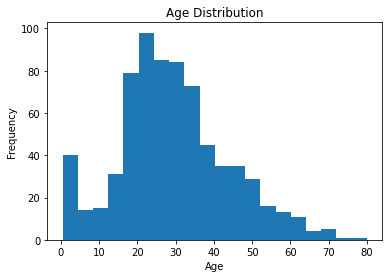

In [12]:
# The "Age" feature is also missing more than 10% of values but since it seems like an important feature, we should not drop it.
#Instead we will impute 
# plot a histogram of the Age column
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [13]:
#Since the age distribution seems skewed, 
# we will use the median value of of Age and replace the nan values with the median value.
# calculate the median age
median_age = df['Age'].median()
# replace the NaN values with the median age
df['Age'].fillna(median_age, inplace=True)
# Move the two rows with nan values in the Embarked column
df.dropna(subset=['Embarked'], inplace=True)

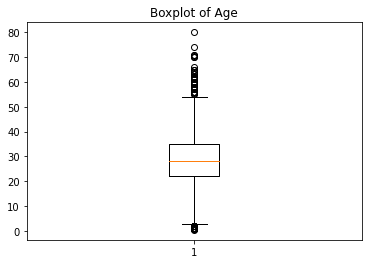

Age outliers:
      Age
0    2.00
1   58.00
2   55.00
3    2.00
4   66.00
..    ...
60   2.00
61   1.00
62   0.83
63  74.00
64  56.00

[65 rows x 1 columns]


In [14]:
import statsmodels.api as sm
# create a boxplot of the Age column
plt.boxplot(df['Age'].dropna())
plt.title('Boxplot of Age')
plt.show()

# identify outliers in the Age column using Tukey's method
q1, q3 = df['Age'].quantile([0.25, 0.75])
iqr = q3 - q1
age_outliers = df[(df['Age'] < q1 - 1.5*iqr) | (df['Age'] > q3 + 1.5*iqr)]
age_outliers = age_outliers.reset_index(drop=True) # reset the index to avoid KeyError
print('Age outliers:')
print(age_outliers[['Age']])
#while there are 64 age outliers, it does not seem right to remove them.


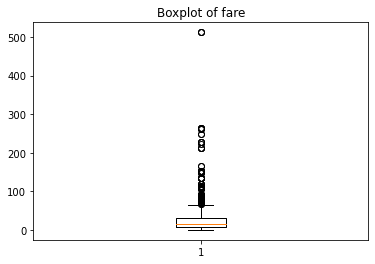

Fare outliers:
0     21.0750
1     26.5500
2     16.0000
3     29.1250
4     10.5000
       ...   
60    39.6875
61    37.0042
62    18.7500
63     7.7750
64    83.1583
Name: Fare, Length: 65, dtype: float64
     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
258         1       1  female  35.0      0      0  512.3292        C
679         1       1    male  36.0      0      1  512.3292        C
737         1       1    male  35.0      0      0  512.3292        C


In [15]:
#Lets look at the fare column next
# create a boxplot of the fare column
plt.boxplot(df['Fare'])
plt.title('Boxplot of fare')
plt.show()

# identify outliers in the Age column using Tukey's method
q1, q3 = df['Fare'].quantile([0.25, 0.75])
iqr = q3 - q1
fare_outliers = df[(df['Fare'] < q1 - 1.5*iqr) | (df['Fare'] > q3 + 1.5*iqr)]
fare_outliers = age_outliers.reset_index(drop=True) # reset the index to avoid KeyError
print('Fare outliers:')
print(fare_outliers['Fare'])
# Seems like there is  extreme outliers in fare that is much much higher than all the rest of the values.  We will remove 
# That value and replace it with the average value of Fare
# Select the rows where the 'Fare' column is greater than 400
high_fare_rows = df.loc[df['Fare'] > 400]

# Replace the fare values in the selected rows with the average fare
avg_fare = df.loc[df['Fare'] > 400, 'Fare']

# Verify that the replacement was made
print(df.loc[df['Fare'] > 400])


In [16]:
# Next lets combine the SibSp and Parch columns and create a new feature called FamilySize.  This will be easier to analyze.
df['FamilySize'] = df['SibSp'] + df['Parch']
# Next lets remove the SibSp and Parch columns
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)


#  EDA
Next we can begin doing exploratory data analysis (EDA) on this data.  We can Start by looking at all the distributions of the features.

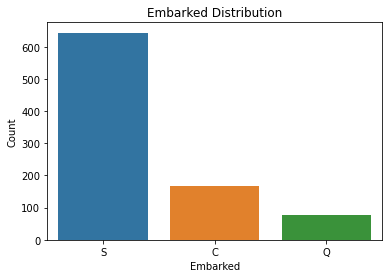

In [17]:
import seaborn as sns
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

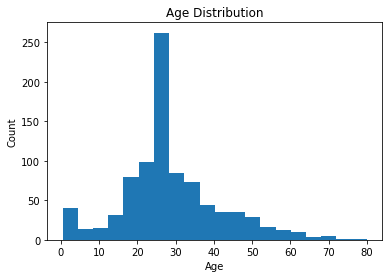

In [18]:
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

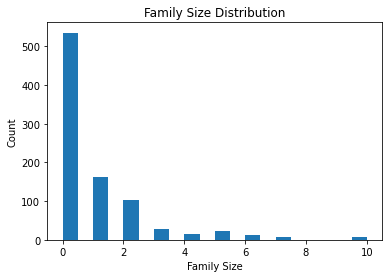

In [19]:
plt.hist(df['FamilySize'], bins=20)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

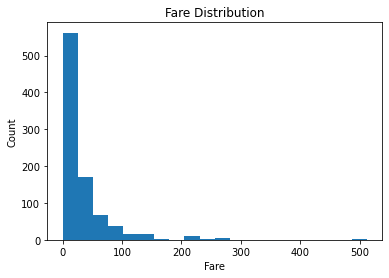

In [20]:
plt.hist(df['Fare'], bins=20)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

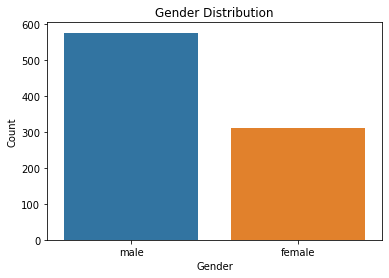

In [21]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

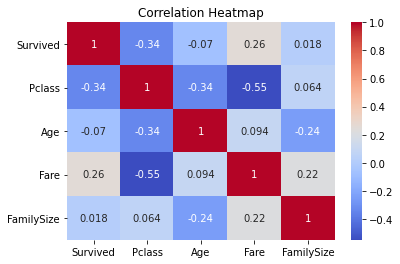

In [22]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

The correlation heatmap shows us that the only features that are correlated is Pclass (Ticket class) and Fare.  Which makes sense, since higher fares should mean a lower class (1st class pays the most).


In [23]:
#sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']])
#the pair-plot does not tell us much that what we already know.

# Analysis (Model Building and Training)
Next we will start building our model, we start first by creating our test and training sets.  Since there is a couple of options to model this data, first we will try logistic regression since our response variabe can only have two options (1 or 0)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.get_dummies(df, columns=['Embarked'])
df = pd.get_dummies(df, columns=['Sex'])

X = df.drop('Survived', axis=1)  # select all columns except 'Survived' as features
y = df['Survived']  # select 'Survived' as the target variable
# One-hot encode 'Embarked' column

# split the data into training and test sets with a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

features = ['Pclass', 'Sex_female', 'Sex_male', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize']
# Creating the logistic regression model
model = LogisticRegression()

# Training the model on the training set
model.fit(X_train, y_train)
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# Viewing the coefficients of the logistic regression model
coef_df = pd.DataFrame({'feature': features, 'coef': model.coef_[0]})
coef_df.sort_values('coef', ascending=False, inplace=True)
print(coef_df)


Accuracy: 0.7808988764044944
      feature      coef
7  Embarked_S  2.227239
4        Fare  0.816222
5  Embarked_C  0.658135
6  Embarked_Q  0.320693
2    Sex_male  0.002572
1  Sex_female -0.039100
3         Age -0.228347
8  FamilySize -0.432189
0      Pclass -1.049643


Looks like The Embarked_S feature had the most impact as well as the Fare and Pclass.  Lets take a look at the P-values:

In [25]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
# print p-values of features
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.442439
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            7
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                  0.3349
Time:                        19:50:24   Log-Likelihood:                -393.33
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.588e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.0910      0.143     -7.614      0.000      -1.372      -0.810
Age           -0.0387      0.

In [26]:
#Since Fare has a high P-value and is also essentially the same as Pclass, 
#lets try removing Fare and retesting the accuracy of our model.
X = df.drop(['Fare', 'Survived'], axis=1)

In [27]:
# split the data into training and test sets with a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression model
model = LogisticRegression()

# Training the model on the training set
model.fit(X_train, y_train)
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
df.head()

Accuracy: 0.7752808988764045


,Survived,Pclass,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,7.2500,1,0,0,1,0,1
1,1,1,38.0,71.2833,1,1,0,0,1,0
2,1,3,26.0,7.9250,0,0,0,1,1,0
3,1,1,35.0,53.1000,1,0,0,1,1,0
4,0,3,35.0,8.0500,0,0,0,1,0,1


In [28]:
#Since it did not improve accuracy, we can try the opposite and remove Pclass while keeping Fare
X = df.drop(['Pclass', 'Survived'], axis=1)

In [29]:
# split the data into training and test sets with a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression model
model = LogisticRegression()

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8033707865168539


So it seems we can improve the accuracy of our model from .7809 to .7977 by removing the Pclass feature while keeping the Fare feature.

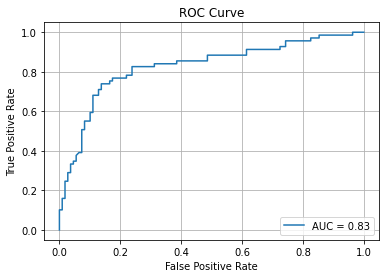

Precision: 0.7428571428571429
Recall: 0.7536231884057971


In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr,th = roc_curve(y_test, y_prob)

# Compute the AUC
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Next we will try to use another method to try and achieve a higher accuracy if possible.  The method we will try next is the random forest method.  First we want to look for the best set of hyperparameters for our random forest.  For this we will uise grid search and perform cross-validation.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search over
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 20, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a random forest classifier
rf = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Best score:  0.8368364030335862


From this we can see that the best hyper-paramter values are 20 for max depth, and 4 for mininum number of samples required to be at a leaf node, 300 trees for estimation, and minimum of 2 sammples required to split an internal node.  Using this we obtain the following accuracy:

In [33]:
# Create the random forest classifier
rfc = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=4)
# Fit the model to the training data
rfc.fit(X_train, y_train)
# Predict on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8033707865168539


So with an accuracy of .8033, it seems the random forest classifier is better at predicting the survival of passengers aboard the Titanic, given thier Age, Passenger Class, Fare Paid,  Family Size, Sex, and Embarking City.